## Correlation basics

In [1]:
##Source article
##https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

### Load packages

In [13]:
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
import seaborn as sns
from numpy import cov
import time
from scipy.stats import pearsonr
from scipy.stats import spearmanr

### Prepare data

In [3]:
# seed random number generator
seed(1)

In [4]:
# prepare data
data1 = 20 * randn(1000) + 100
#20 is the standard deviation, there are 1000 random numbers with a mean of 100
data2 = data1 + (10 * randn(1000) + 50)
#In the second dataset there are also 1000 random numbers with a SD of 10 and a mean of 50.
#This second dataset is added to dataset 1 in order to generate noise. 

In [5]:
# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))

data1: mean=100.776 stdv=19.620
data2: mean=151.050 stdv=22.358


/Users/jessicachew/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

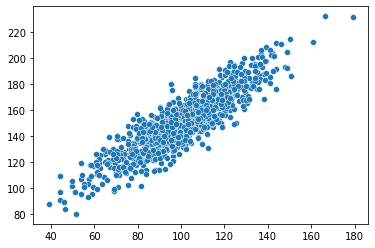

In [6]:
# plot  
sns.scatterplot(data1, data2)

### Covariance - an important statistical building block

#### - Variables can be related by a linear relationship
#### - This means it's a relationship that is consistently additative across the two data samples
#### - The summary of the relationship is called the covariance
#### - Covariance is defined as the average of the product of the values from each sample, after each value has been 'centered', i.e., the mean has been subtracted from each variable
#### - The calculation is cov(X,Y) = sum(x - mean(X)) * (y - mean(Y))) * 1/(n-1)
#### - The use of mean in this calculation means that each data sample needs to have a Gaussian or Gaussian - like distribution
#### - The sign of the covariance result (whether positive or negative) can be interpreted as whether the two variables change in the same or different directions.
#### - The challenge is that magnitude is not easily discernable. A covariance of zero means that both variables are completely independent
#### - The NumPy function for calculating covariance is cov()

In [9]:
#Calculate covariance
start = time.time()
covariance = cov(data1,data2)
print(covariance)
end = time.time()
print ('Seconds elapsed' , end-start)

[[385.33297729 389.7545618 ]
 [389.7545618  500.38006058]]
Seconds elapsed 0.006017923355102539


#### The covariance of the two variables is 389.75, moving in a positive direction as we expect.
#### Leveraging covariance to describe the relationshiop is reasonable in this instance because the data came from a Gaussian distribution and the variables are linearly correlated (because we contrived the data in such a way).
#### However, covariance as a statistical tool alone is difficult to interpret. We can now look to the pearson correlation coefficient.


### Pearson's correlation

#### - The Pearson's correlation is used to summarise the strength of the linear relationship between two data samples
#### - Pearson's correlation coefficient = covariance(X,Y) / (stdv(X) * stdv(Y))
#### - The use of mean (in the covariance calculation) and standard deviatioon means that the two data samples need to have a Gaussian or Gaussian-like distribution
#### - The result is a number between -1 and 1, with a result of 0 meaning no correlation. Often, a value below -0.5 or above 0.5 indicates notable correlation. 
#### For two data samples of the same length, SciPy's pearsonr() function can calculate the Pearson's correlation coefficient. 

In [12]:
#calculate Pearson's correlation
corr,_ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.888


### Spearman's Correlation
#### This kind of correlation should be used when two variables may be related by a non-linear relationship. That is, the relationship could be stronger or weaker across the distribution of the variables.
#### Furthermore, the two variables considered may have a non-Gaussion distribution. If unsure of distribution and possible relationships, Spearman's correlation coefficient is a good choice.
#### This correlation also measures the strength of relationship between the two data samples. It can also be used if there actually is a linear relationship, but it will have slightly less power. 
#### The score also ranges between -1 and 1. 

#### The key differentiator for Spearman's correlation versus Pearson's correlation is that Spearman's statistics are calculated from the relative rank of values on each sample (rather than the covariance and standard deviations of the samples themselves). 
#### This approach is common in non-parametric statistics (i.e., we don't assume a distribution of the data, e.g., Gaussian). 
#### Spearman's correlation coefficient = covariance(rank(X),rank(Y)) / (stdv(rankX))

In [14]:
#calculate Spearman's correlation
corr,_ = spearmanr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.872
